## [Evaluation] Datasets we generated as ground truth from the OpenKDD day

Below we use two different active learning algorithms for predicting the complete dataset
- Random Sampling
    (with mean of past values as predcitor)
- Uncertainty Sampling 
    (with a Gaussian Prior and metapaths transformed based on length and uniqueness, rbf-kernel as distance function)
    
We can see that the random sampler coverges more slowly than the uncertainty sampled algorithm.
Also, the latter halts improvment and does not converge to zero. This might be, because the transformation is not unique.

In [1]:
import os, sys
os.chdir(os.path.join('..','..','..')) # set working directory to root of github repo

In [2]:
%matplotlib inline
from active_learning.oracles import UserOracle
from active_learning.evaluation import *
from active_learning.active_learner import RandomSelectionAlgorithm
import matplotlib.pyplot as plt

In [3]:
def plot_ratings(kdd_raters,batch_size,seed,algorithm,algo_params,oracle,oracle_params):
    for rater in kdd_raters:
        oracle_params = {'ground_truth_path':rater}
        evaluator = Evaluator(algorithm=algorithm, algo_params=algo_params,
                             oracle=oracle, oracle_params=oracle_params,
                             batch_size=batch_size, dataset_name='Rotten Tomato')
        stats = evaluator.compute()
        stats['mse'].plot(label=rater)
    ax = plt.gca()
    ax.legend(loc='lower left',bbox_to_anchor=(0.5, 0.5))
    plt.ylabel('MSE')
    plt.xlabel('iterations')
    plt.show()

In [4]:
seed = 21

In [5]:
kdd_raters = ['rated_datasets/Rotten Tomato_Merlin_1519148528.2417703.json',
             'rated_datasets/Rotten Tomato_mcfelix_1519142949.904623.json',
             'rated_datasets/Rotten Tomato_Constantin Lange_1519139724.4022887.json',
             'rated_datasets/Rotten Tomato_Potato_1519142479.127663.json',
             'rated_datasets/Rotten Tomato_Juliane_1519146371.039609.json']

### Uncertainty Sampling 

Batch_size: 1
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


/home/bpgraphexploration/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


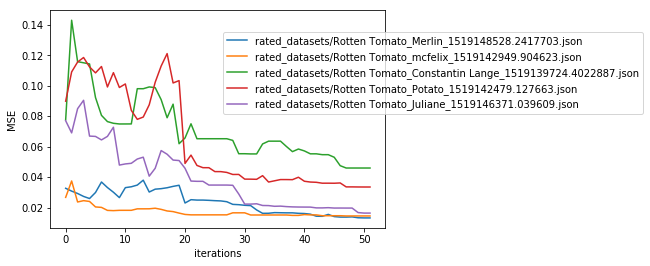

Batch_size: 2
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


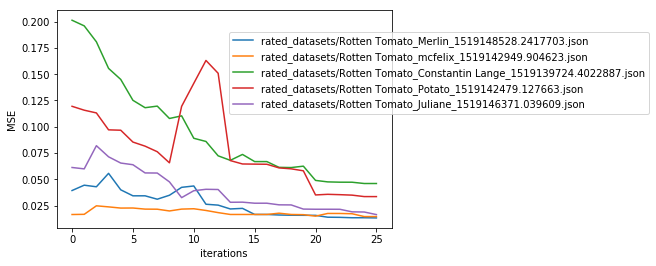

Batch_size: 3
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


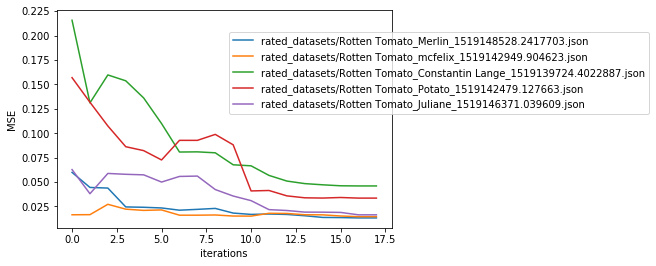

Batch_size: 4
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


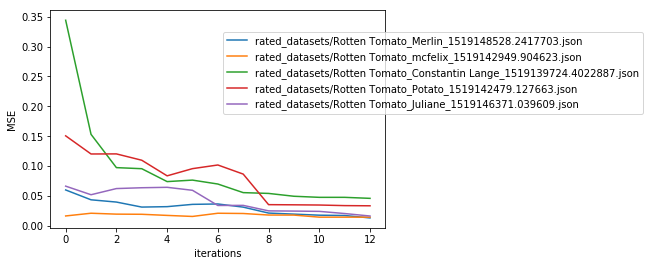

Batch_size: 5
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


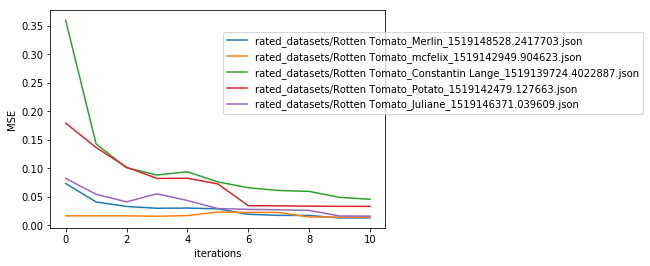

Batch_size: 6
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


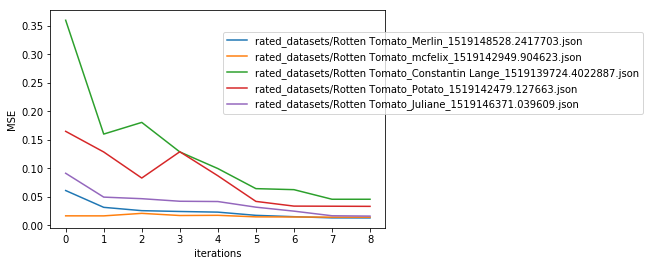

Batch_size: 7
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


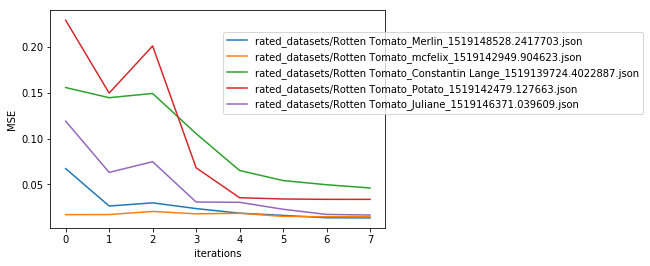

Batch_size: 8
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


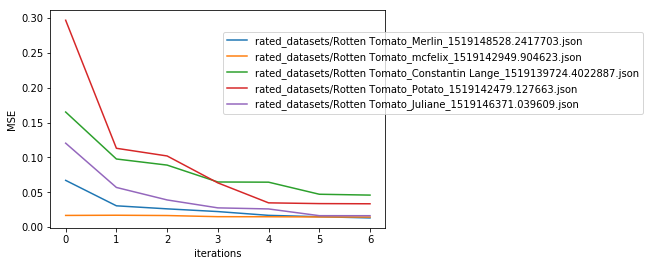

Batch_size: 9
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51
ROTTENTOMATOMETAPATHLOADER: Number of meta-paths is 51


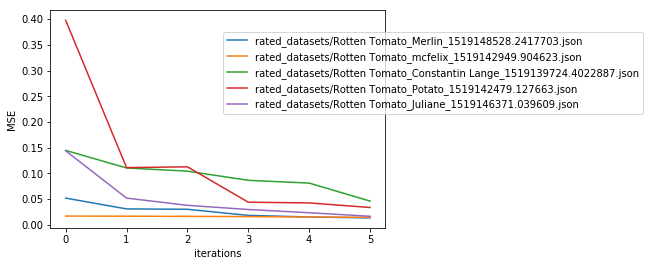

In [6]:
algorithm=UncertaintySamplingAlgorithm
algo_params = {'hypothesis': 'Gaussian Process', 'hypothesis_params':{'transformation':'tfidf'}}
oracle=UserOracle
oracle_params={}

for batch_size in range(1,10):
    print("Batch_size: {}".format(batch_size))
    plot_ratings(kdd_raters,batch_size,seed,algorithm=algorithm,
                     algo_params=algo_params,oracle=oracle,oracle_params=oracle_params)

### Random Sampling 

Batch_size: 1


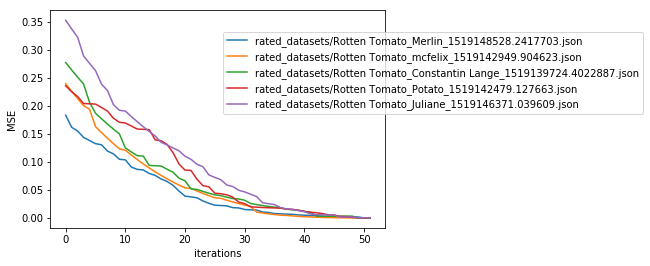

Batch_size: 2


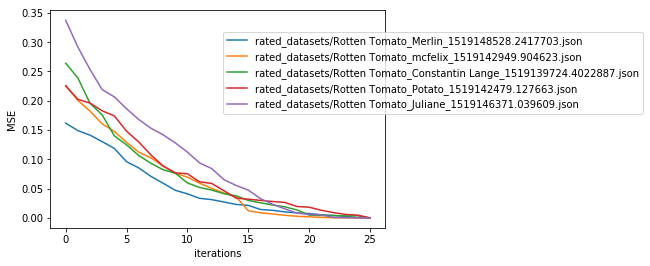

Batch_size: 3


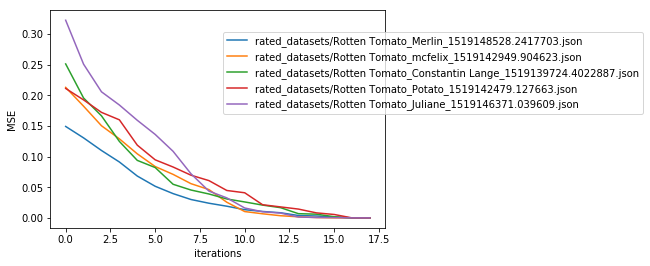

Batch_size: 4


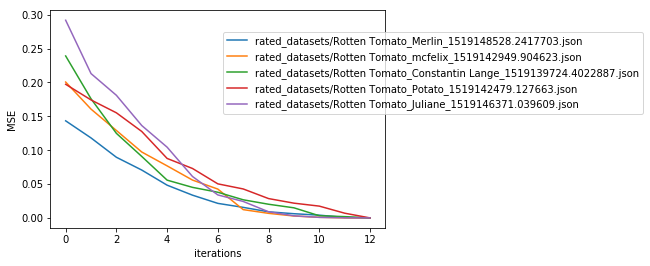

Batch_size: 5


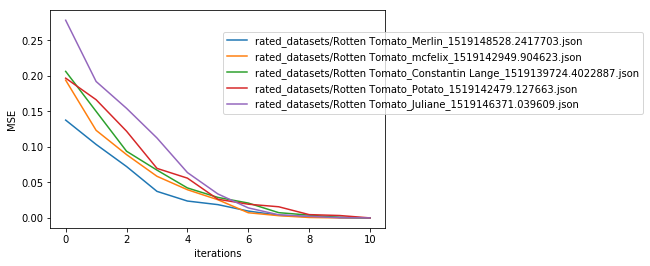

Batch_size: 6


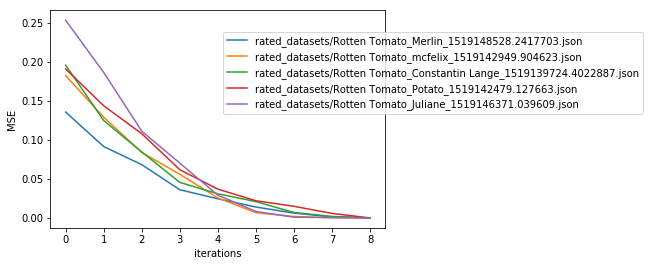

Batch_size: 7


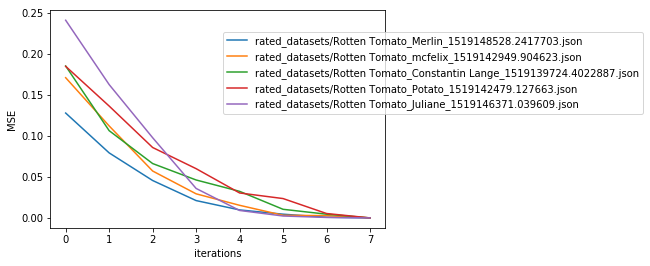

Batch_size: 8


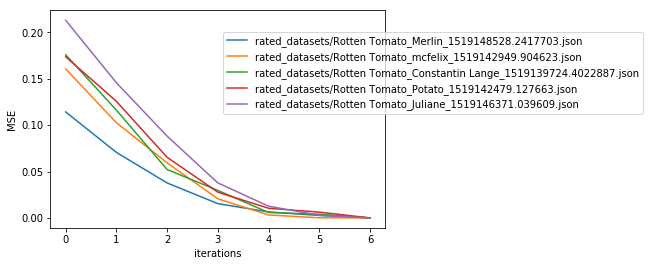

Batch_size: 9


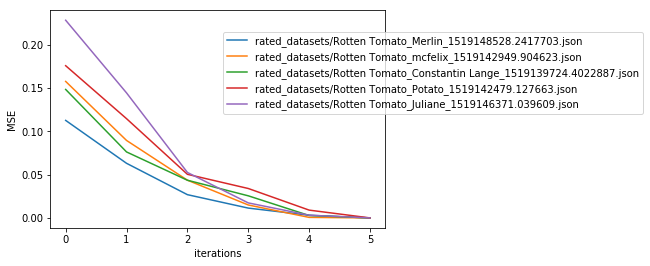

In [7]:
algorithm=RandomSelectionAlgorithm
algo_params={}
oracle=UserOracle
oracle_params={}

for batch_size in range(1,10):
    print("Batch_size: {}".format(batch_size))
    plot_ratings(kdd_raters,batch_size,seed,algorithm=algorithm,
                     algo_params=algo_params,oracle=oracle,oracle_params=oracle_params)